In [1]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

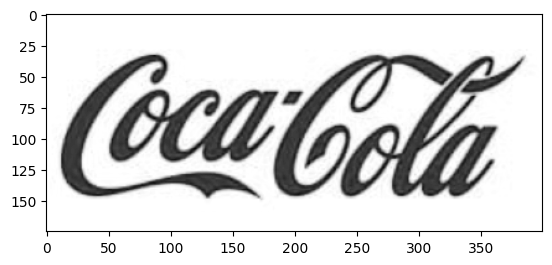

In [2]:
#Se carga el TEMPLATE
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
plt.imshow(template, cmap='gray')

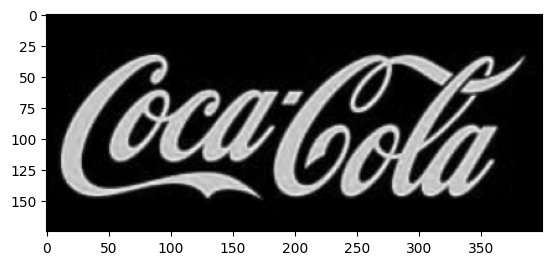

In [10]:
#Se prepara el TEPLATE alternativo
plt.imshow(cv.bitwise_not(template)+75, cmap='gray')

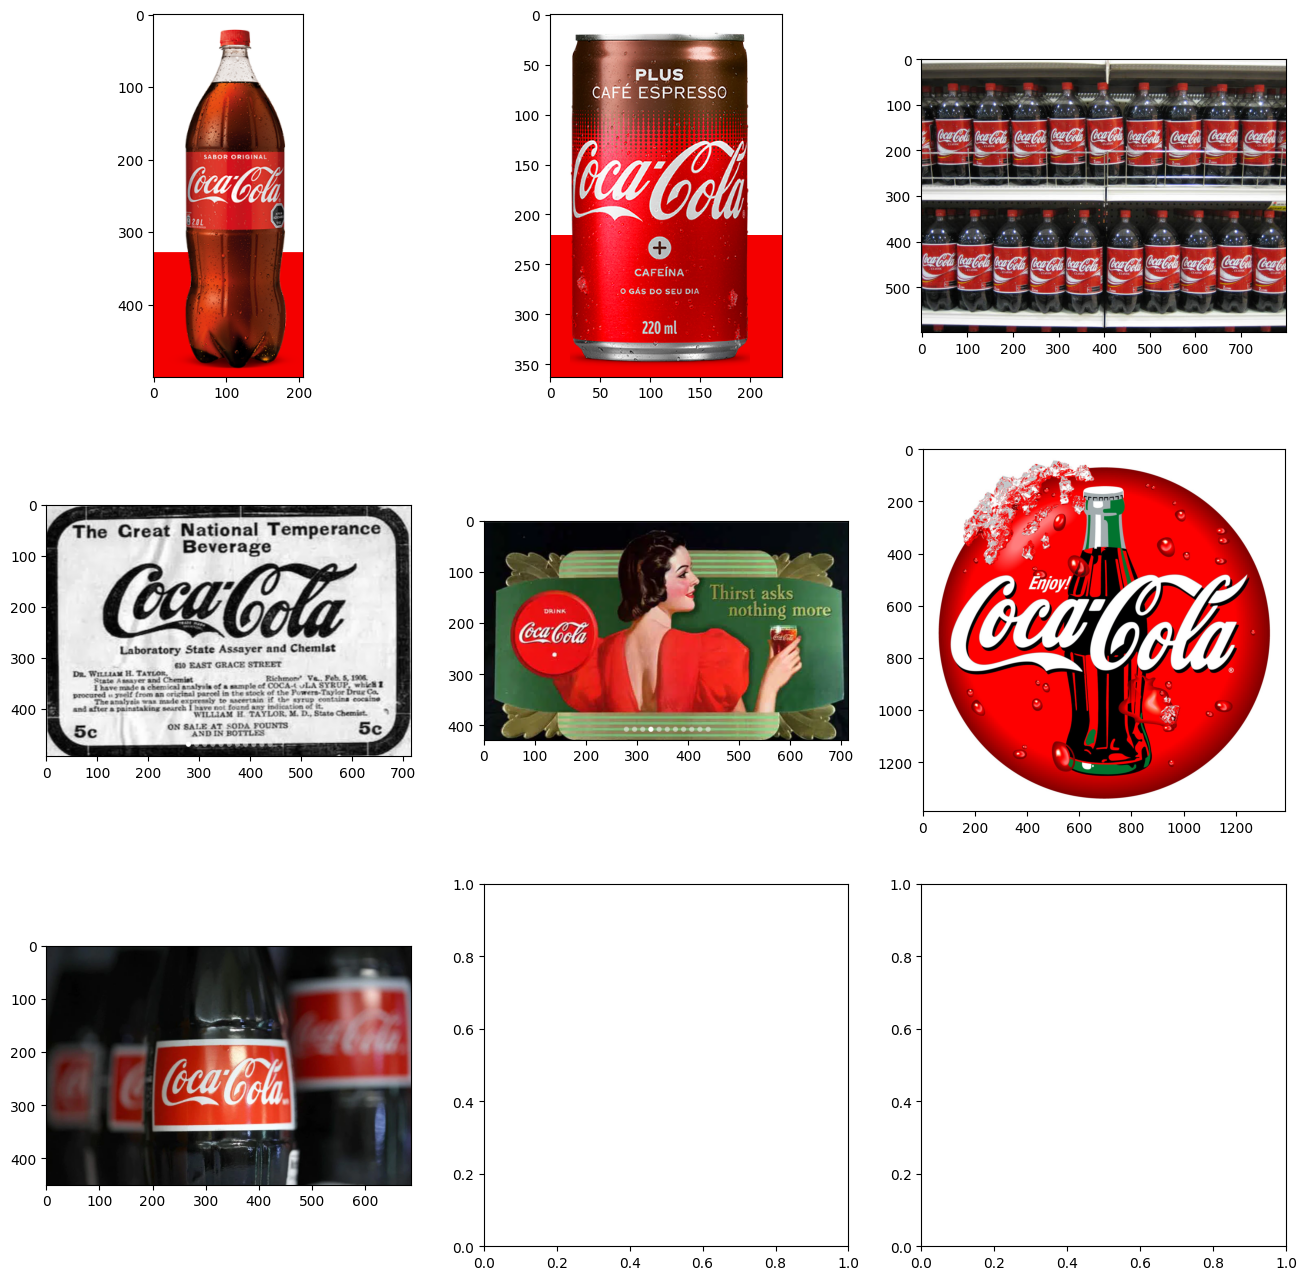

In [6]:
#Se cargan las imagenes provistas
archivos = ['coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'COCA-COLA-LOGO.jpg', 'logo_1.png']
fig, ax = plt.subplots(3, 3, figsize=(16,16))
i, j = 0, 0

imagenes = []
for name in archivos:
    img = cv.imread('images/'+name)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imagenes.append(img_rgb)
    ax[i][j].imshow(img_rgb)
    j += 1
    if j == 3:
        i += 1
        j = 0

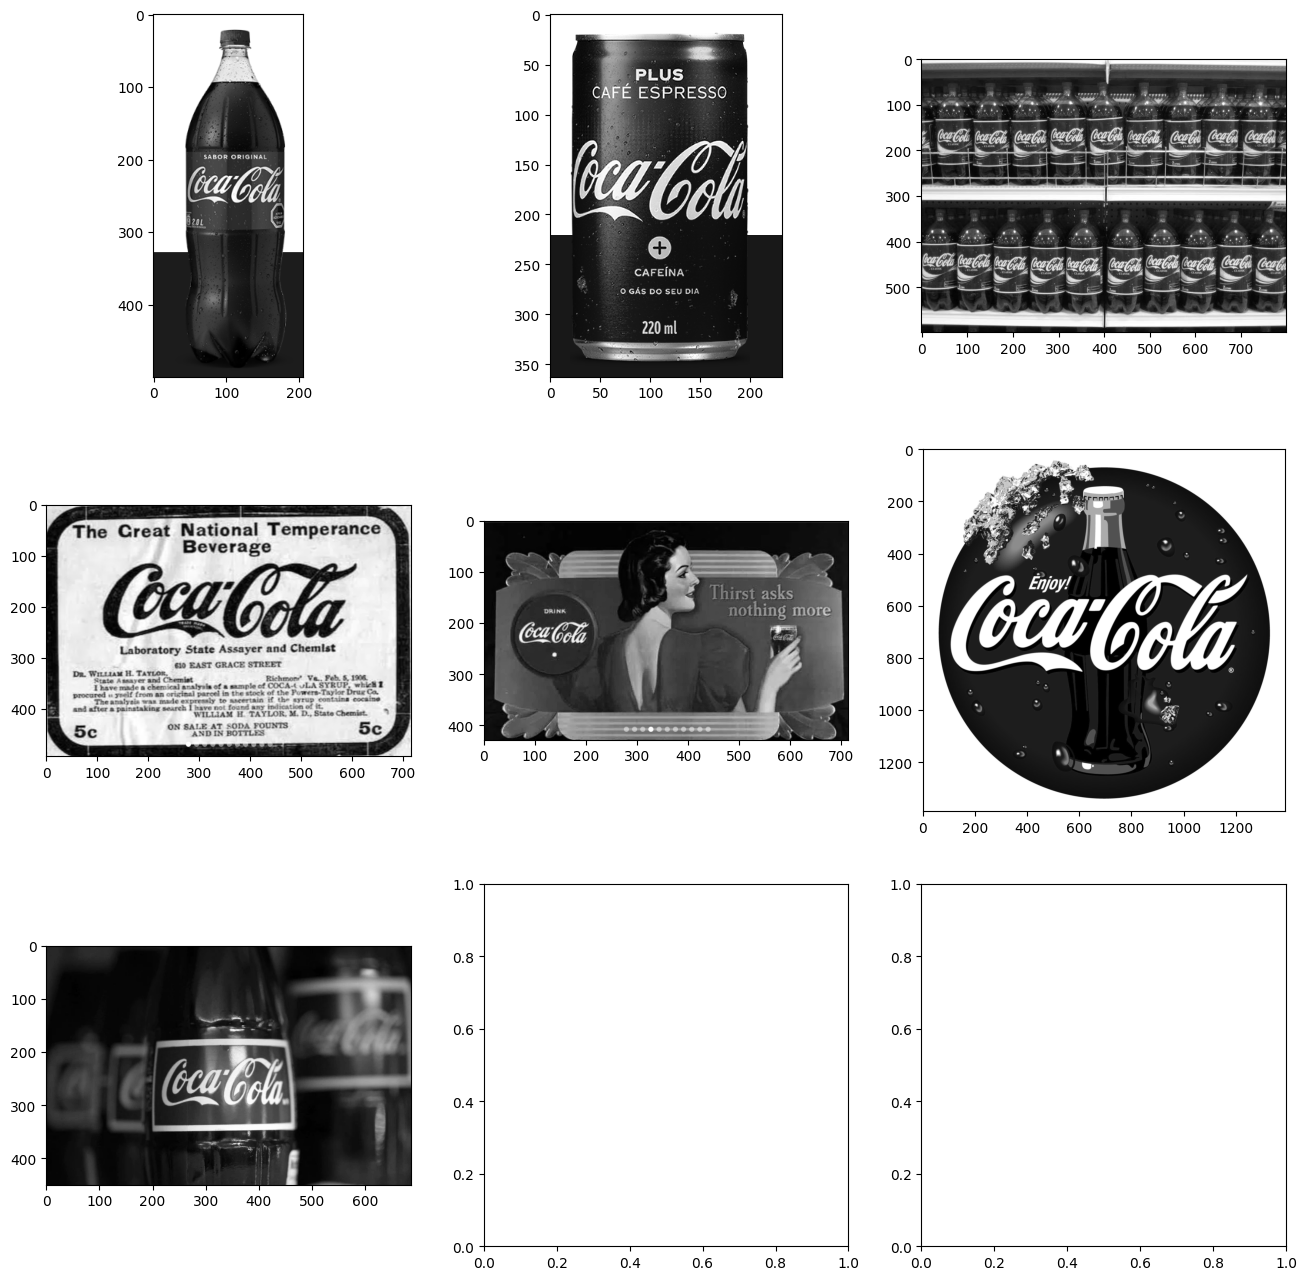

In [9]:
# Imagenes en escala de grises
fig, ax = plt.subplots(3, 3, figsize=(16,16))
i, j = 0, 0
imagenes_gray = []
for img in imagenes:
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    imagenes_gray.append(img_gray)
    ax[i][j].imshow(img_gray,cmap='gray')
    j += 1
    if j == 3:
        i += 1
        j = 0

Se prueban 3 metodos para la primera imagen

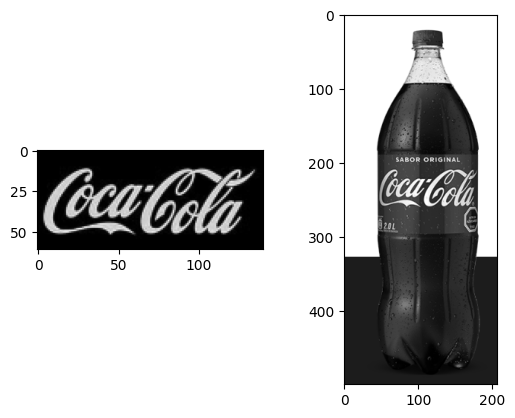

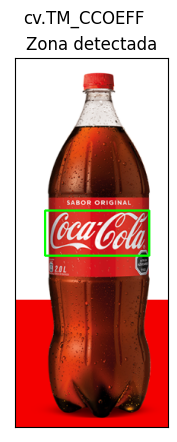

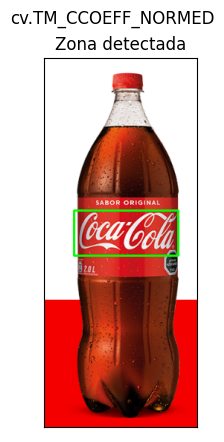

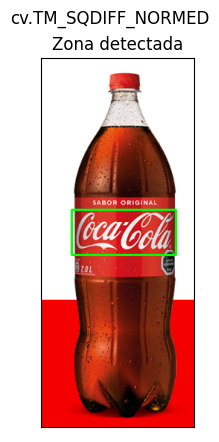

In [18]:
metodos = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 0

img_rgb = imagenes[num_imagen]
img_gray = imagenes_gray[num_imagen]

#Ajuste del template
template_ajustado = cv.resize(template, None, fx=0.35, fy=0.35)
temp = cv.bitwise_not(template_ajustado)+75
w, h = template_ajustado.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for met in metodos:
        img_salida = img_rgb.copy()
        metodo = eval(met)
        
        res = cv.matchTemplate(img_gray, temp, metodo)
        
        # Extracción de extremos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if metodo in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        plt.figure()
        
        # Imagen original con recuadros
        plt.imshow(img_salida)
        plt.title('Zona detectada'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(met)
        plt.show()

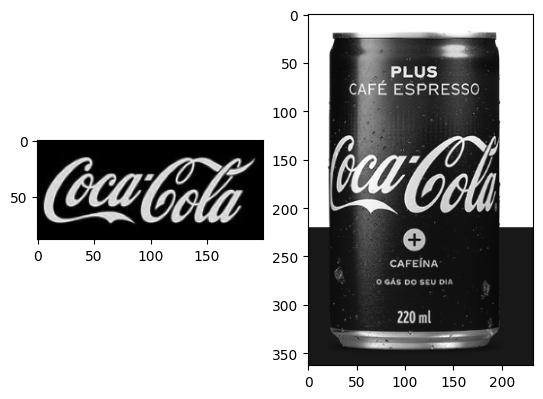

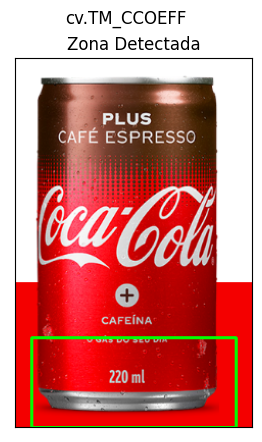

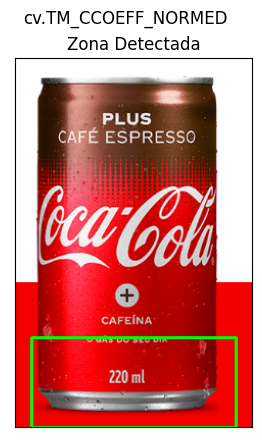

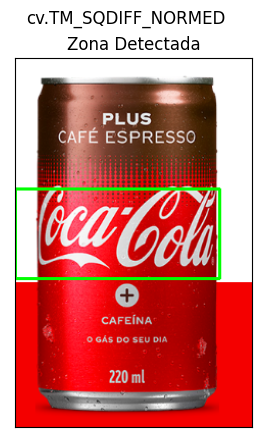

In [24]:
metodos = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 1

img_rgb = imagenes[num_imagen]
img_gray = imagenes_gray[num_imagen]

#Ajuste del template
template_ajustado = cv.resize(template, None, fx=0.5, fy=0.5)
temp = cv.bitwise_not(template_ajustado)+75
w, h = template_ajustado.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for met in metodos:
        img_salida = img_rgb.copy()
        metodo = eval(met)
        
        res = cv.matchTemplate(img_gray, temp, metodo)
        
        # Extracción de extremos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Para TM_SQDIFF o TM_SQDIFF_NORMED, se toma mínimo
        if metodo in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        plt.figure()
        
        # Imagen original con recuadros
        plt.imshow(img_salida)
        plt.title('Zona Detectada'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(met)
        plt.show()

El metodo TM_SQDIFF_NORMED funcionó bien respecto a los otros


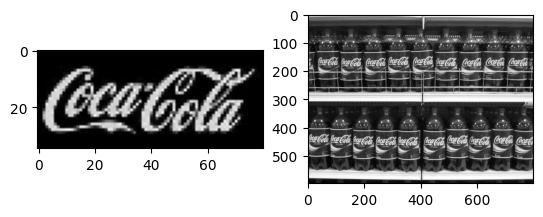

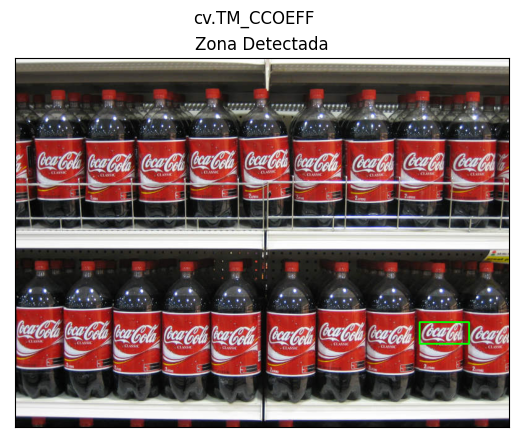

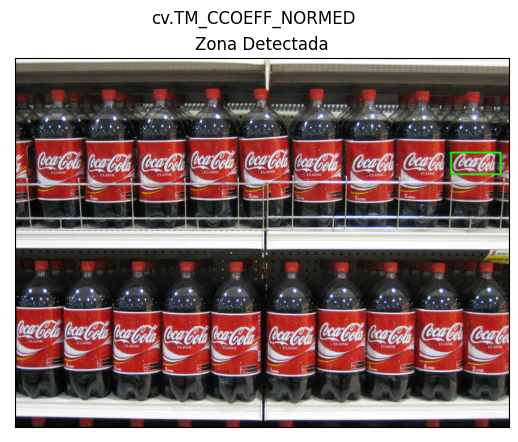

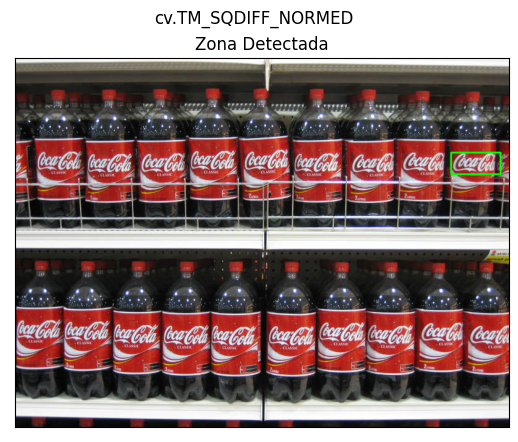

In [25]:
metodos = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 2

img_rgb = imagenes[num_imagen]
img_gray = imagenes_gray[num_imagen]

#Ajuste del template
template_ajustado = cv.resize(template, None, fx=0.2, fy=0.2)
temp = cv.bitwise_not(template_ajustado)+75
w, h = template_ajustado.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for met in metodos:
        img_salida = img_rgb.copy()
        metodo = eval(met)
        
        res = cv.matchTemplate(img_gray, temp, metodo)
        
        # Extracción de extremos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Para TM_SQDIFF o TM_SQDIFF_NORMED, se toma mínimo
        if metodo in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        plt.figure()
        
        # Imagen original con recuadros
        plt.imshow(img_salida)
        plt.title('Zona Detectada'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(met)
        plt.show()

Cuarta imagen:

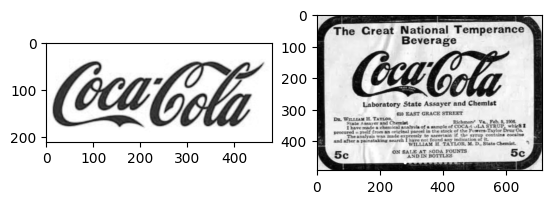

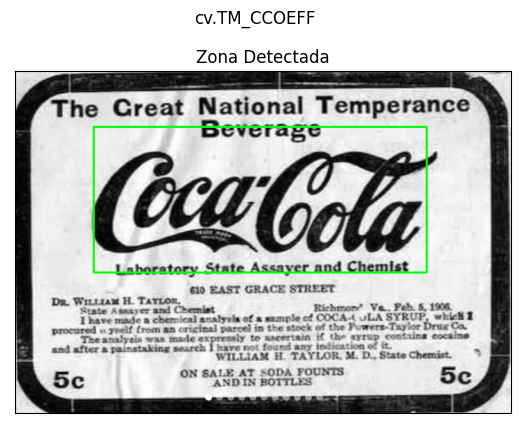

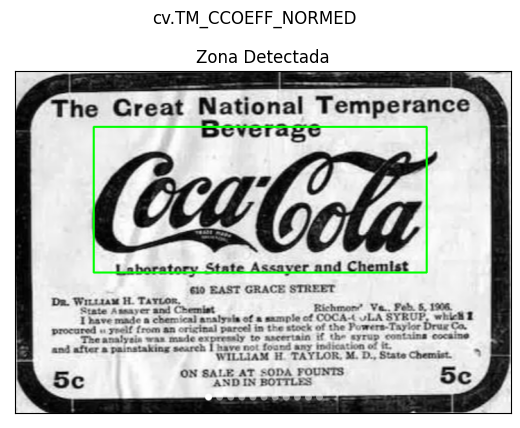

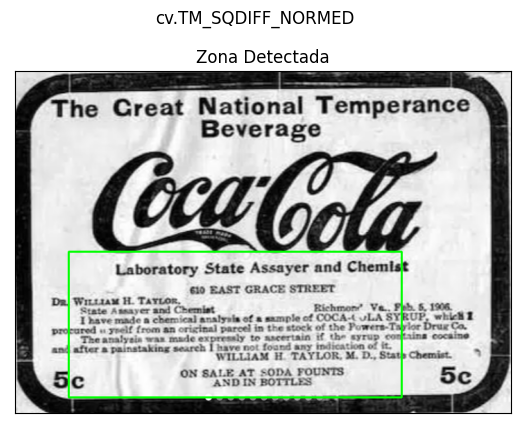

In [27]:
metodos = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 3

img_rgb = imagenes[num_imagen]
img_gray = imagenes_gray[num_imagen]

#Ajuste del template
template_ajustado = cv.resize(template, None, fx=1.2, fy=1.2)
#temp = cv.bitwise_not(template_ajustado)+75
temp=template_ajustado
w, h = template_ajustado.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for met in metodos:
        img_salida = img_rgb.copy()
        metodo = eval(met)
        
        res = cv.matchTemplate(img_gray, temp, metodo)
        
        # Extracción de extremos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Para TM_SQDIFF o TM_SQDIFF_NORMED, se toma mínimo
        if metodo in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        plt.figure()
        
        # Imagen original con recuadros
        plt.imshow(img_salida)
        plt.title('Zona Detectada'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(met)
        plt.show()

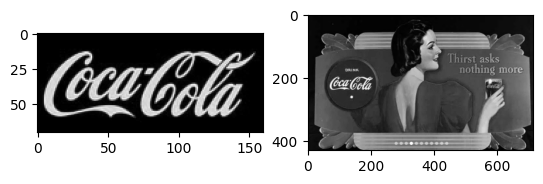

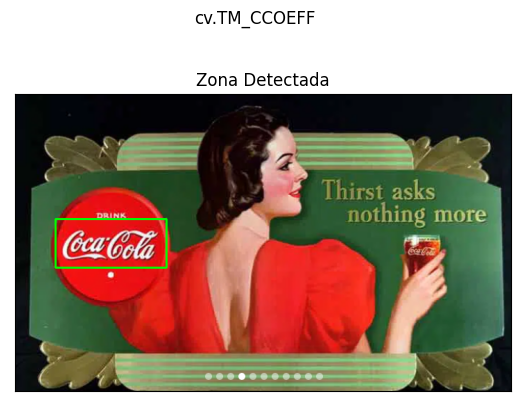

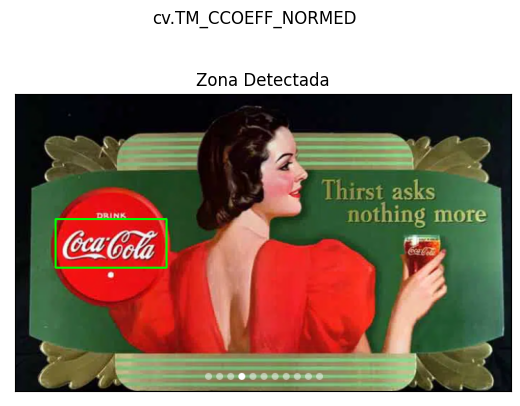

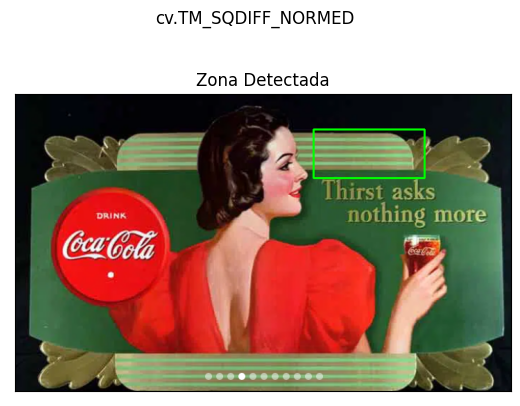

In [30]:
metodos = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 4

img_rgb = imagenes[num_imagen]
img_gray = imagenes_gray[num_imagen]

#Ajuste del template
template_ajustado = cv.resize(template, None, fx=0.4, fy=0.4)
temp = cv.bitwise_not(template_ajustado)+75
w, h = template_ajustado.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for met in metodos:
        img_salida = img_rgb.copy()
        metodo = eval(met)
        
        res = cv.matchTemplate(img_gray, temp, metodo)
        
        # Extracción de extremos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Para TM_SQDIFF o TM_SQDIFF_NORMED, se toma mínimo
        if metodo in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        plt.figure()
        
        # Imagen original con recuadros
        plt.imshow(img_salida)
        plt.title('Zona Detectada'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(met)
        plt.show()

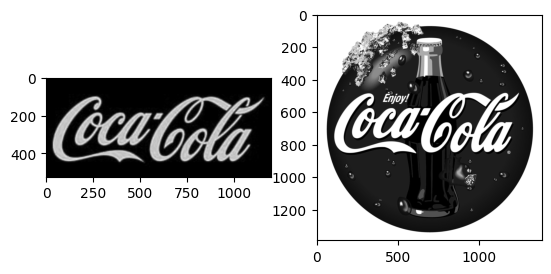

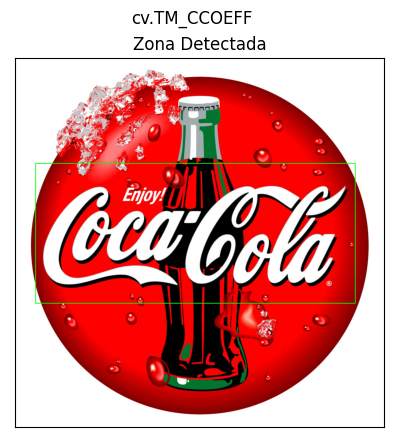

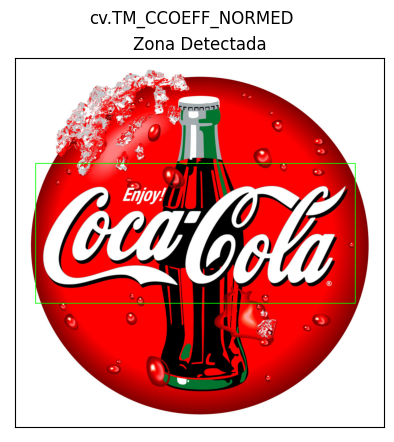

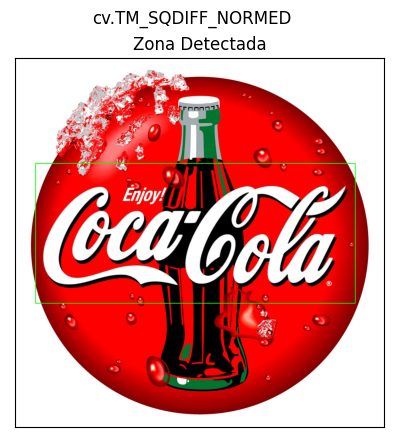

In [32]:
metodos = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 5

img_rgb = imagenes[num_imagen]
img_gray = imagenes_gray[num_imagen]

#Ajuste del template
template_ajustado = cv.resize(template, None, fx=3, fy=3)
temp = cv.bitwise_not(template_ajustado)+75
w, h = template_ajustado.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for met in metodos:
        img_salida = img_rgb.copy()
        metodo = eval(met)
        
        res = cv.matchTemplate(img_gray, temp, metodo)
        
        # Extracción de extremos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Para TM_SQDIFF o TM_SQDIFF_NORMED, se toma mínimo
        if metodo in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        plt.figure()
        
        # Imagen original con recuadros
        plt.imshow(img_salida)
        plt.title('Zona Detectada'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(met)
        plt.show()

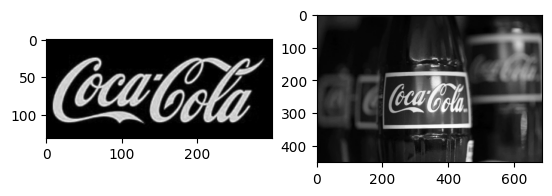

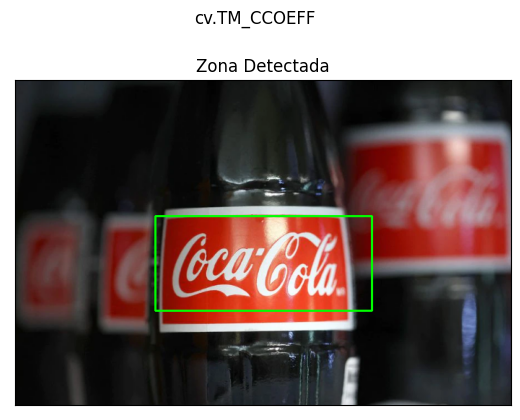

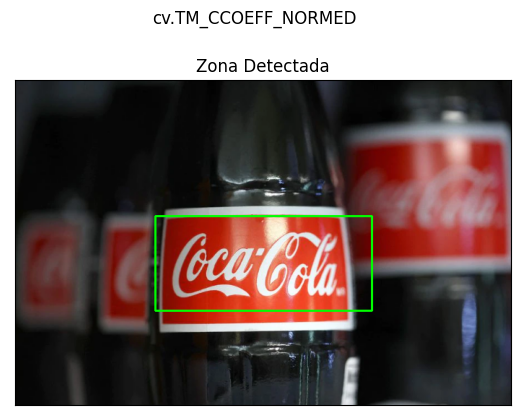

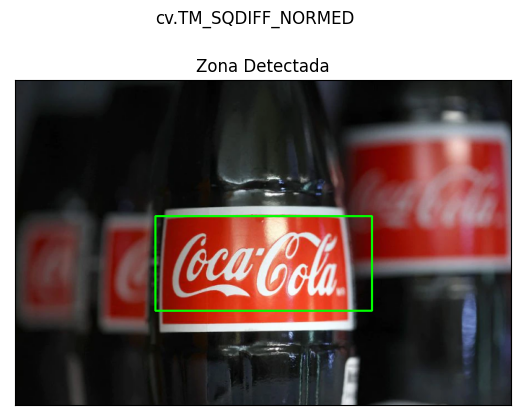

In [33]:
metodos = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 6

img_rgb = imagenes[num_imagen]
img_gray = imagenes_gray[num_imagen]

#Ajuste del template
template_ajustado = cv.resize(template, None, fx=0.75, fy=0.75)
temp = cv.bitwise_not(template_ajustado)+75
w, h = template_ajustado.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for met in metodos:
        img_salida = img_rgb.copy()
        metodo = eval(met)
        
        res = cv.matchTemplate(img_gray, temp, metodo)
        
        # Extracción de extremos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Para TM_SQDIFF o TM_SQDIFF_NORMED, se toma mínimo
        if metodo in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        plt.figure()
        
        # Imagen original con recuadros
        plt.imshow(img_salida)
        plt.title('Zona Detectada'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(met)
        plt.show()

Detecciones Multiples

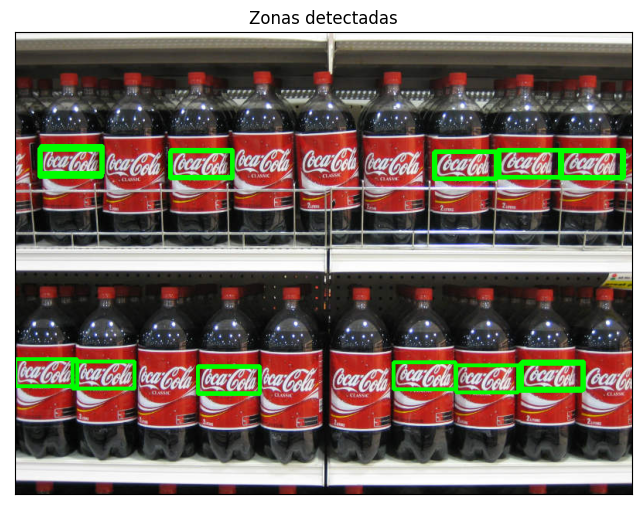

In [52]:
template_ajustado = cv.resize(template, None, fx=0.2, fy=0.2)
temp = cv.bitwise_not(template_ajustado)+75

res = cv.matchTemplate(img_gray,temp,cv.TM_CCOEFF_NORMED)

# Se realizó pruebas con distintos umbrales para lograr las mayor cantidad de detecciones
threshold = 0.3795

img_salida = img_rgb.copy()

loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv.rectangle(img_salida, pt, (pt[0] + w, pt[1] + h), (0,255,0), 3)

plt.figure(figsize=(18,6))
        
plt.imshow(img_salida)
plt.title('Zonas detectadas'), plt.xticks([]), plt.yticks([])
        
plt.show()